In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
angle = pd.read_csv('angle.csv')
loss = pd.read_csv('losses.csv')
reward = pd.read_csv('rewards.csv')

In [7]:
angle.head()

,Wall time,Step,Value
0,1.621430e+09,1,0.235319
1,1.621430e+09,2,0.890998
2,1.621430e+09,3,1.832524
3,1.621430e+09,4,2.919611
4,1.621430e+09,5,4.038129


In [25]:
def EMA(data, alpha=0.3):
    result = []
    for i, datum in enumerate(data):
        if i == 0:
            result.append(datum)
        else:
            result.append(alpha*datum+(1-alpha)*result[-1])
    return result

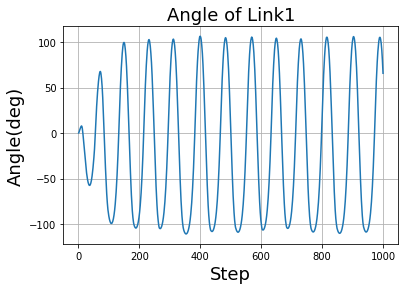

In [49]:
plt.plot(angle['Step'], angle['Value'])
plt.grid(True)
size = 18
plt.title('Angle of Link1', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Angle(deg)', fontsize=size)
plt.show()

In [50]:
loss['Value'][3]

130.17617797851562

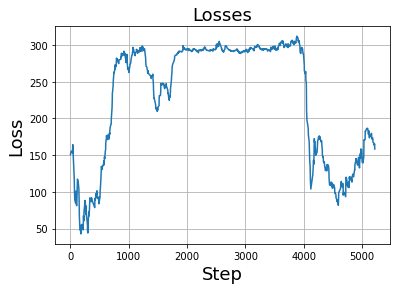

In [51]:
loss_value = EMA(loss['Value'], alpha=0.1)
plt.plot(loss['Step'], loss_value)
plt.grid(True)
size = 18
plt.title('Losses', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Loss', fontsize=size)
plt.show()

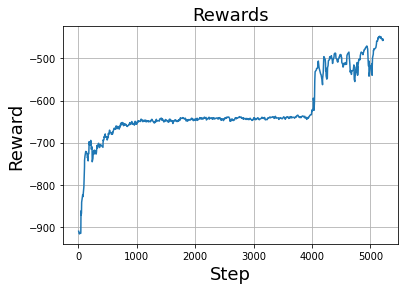

In [52]:
reward_value = EMA(reward['Value'], alpha=0.2)
size = 18
plt.plot(reward['Step'], reward_value)
plt.grid(True)
plt.title('Rewards', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Reward', fontsize=size)
plt.show()